# Dataset G profiling
Dataset columns are printed with their standardized distribution. Pandas-profiling (https://github.com/pandas-profiling/pandas-profiling) is used to display relevant metrics.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import src.core_stateless as statelessApi
from src.core import valueDistribution 
from src.core_configs import getConfigG

Using TensorFlow backend.


In [2]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = getConfigG("30min")

relevantColumns, columnDescriptions, columnUnits, columnNames, df = statelessApi.initDataframe(
    filename,
    columns,
    irrelevantColumns,
)

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP



# Value Distribution
On the left, plots of the standardized sample points for each column can be seen. On the right, a distribution of the standardized values is shown. Training points are plotted in dark blue, while testing points are light blue.

Notice how the coolant inlet temperature is varying with the seasons of the year, with cold temperatures in the winter and hot temperatures in the summer. The operating point of the gas inlet temperature seems to have shifted somewhat in the spring of 2018, incdicating some changes to the facility.

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 4708 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows



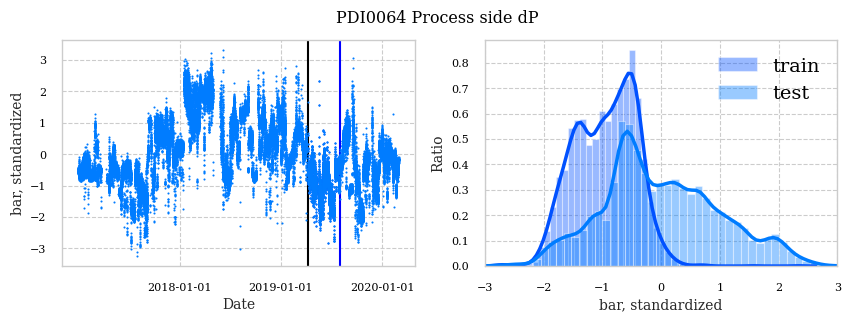

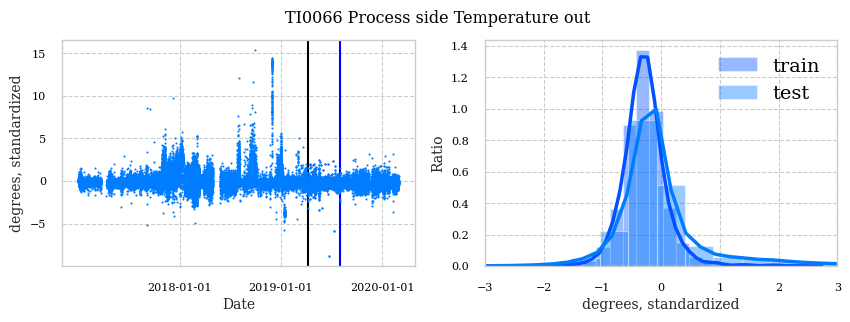

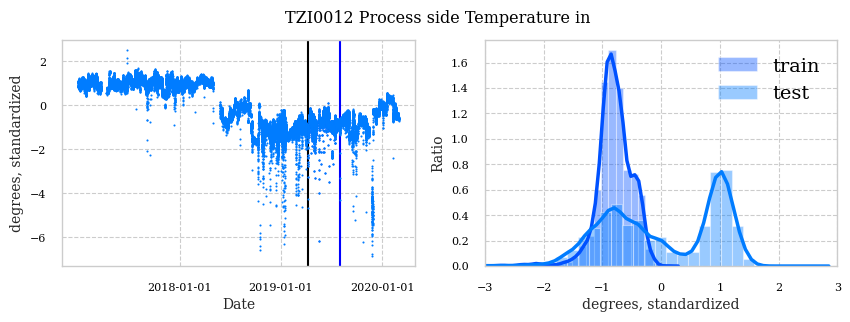

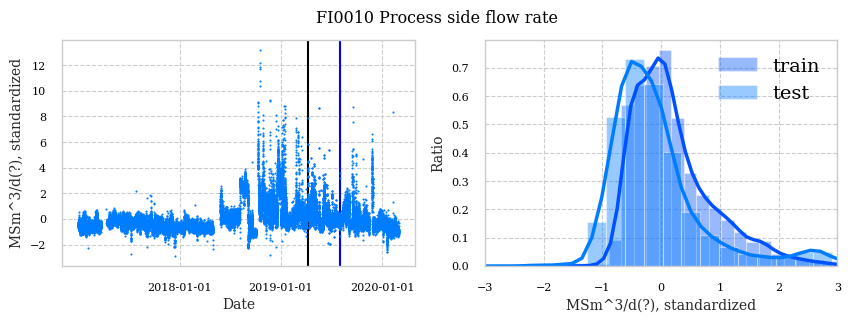

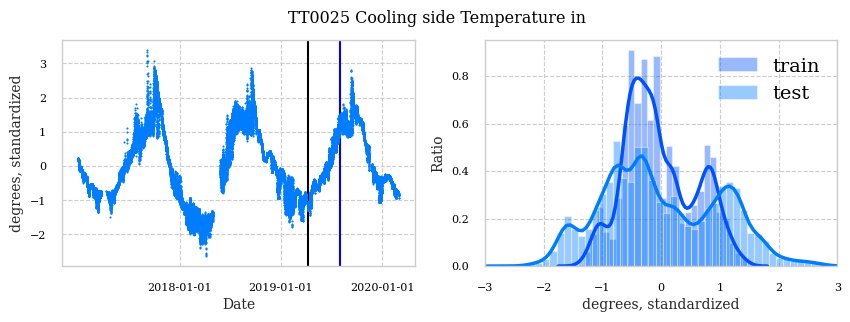

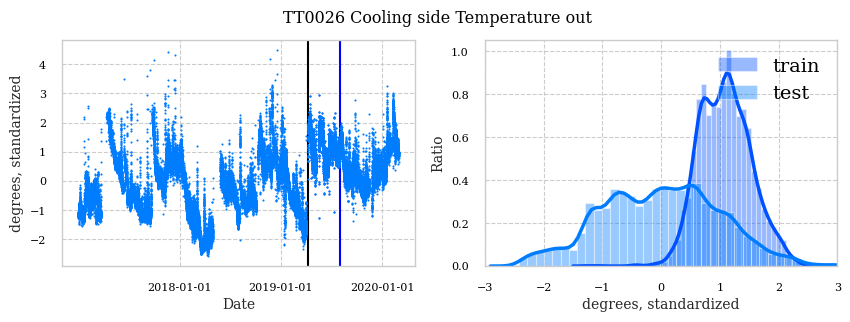

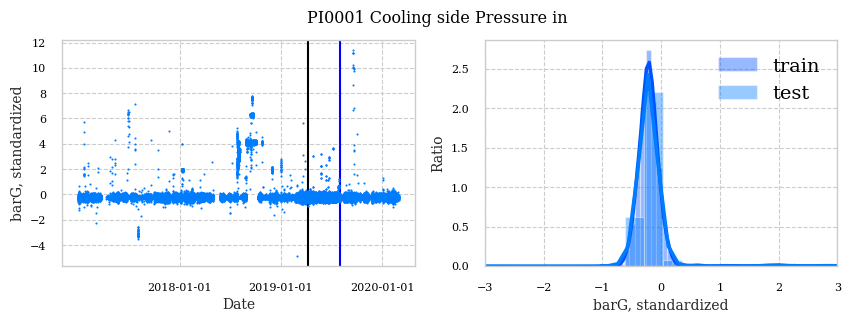

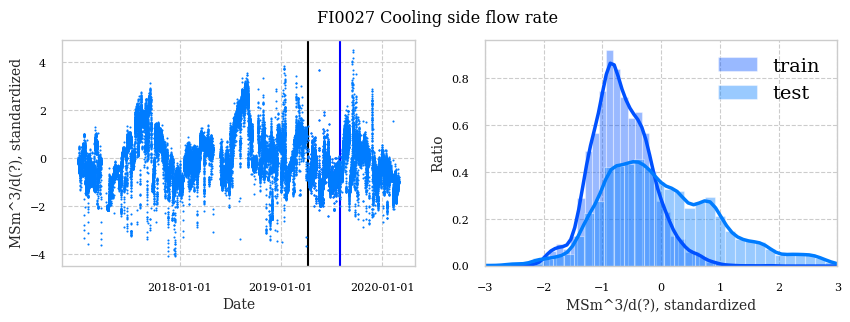

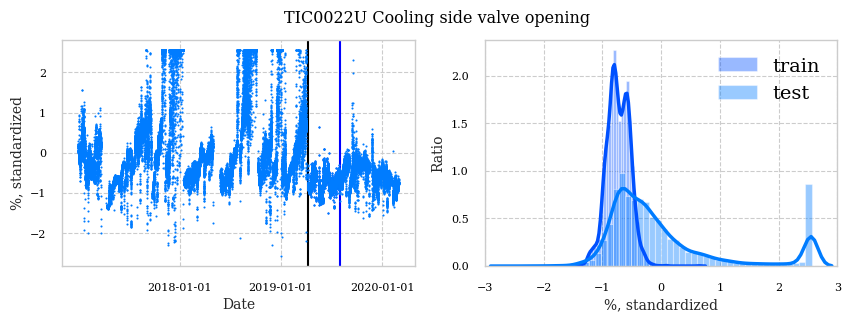

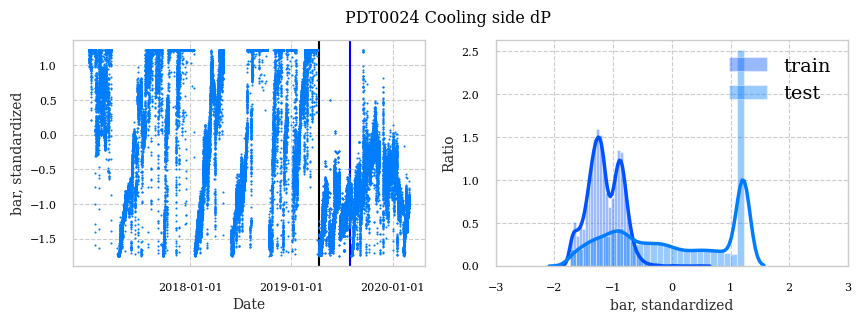

In [3]:
valueDistribution(df, traintime, testtime, columnDescriptions, columnUnits)

# Profiling
Pandas profiling offers detailed information about the provided dataset. Metrics such as missing cells, memory size, column uniqueness and column correlation can be seen.

In [4]:
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report.to_file(output_file="profiling/dataset_profiling_G.html")
report